In [132]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [133]:
import seaborn 
seaborn.set()

In [135]:
def run_query(db, sql_query):
    db.mycursor.execute(sql_query)
    records = db.mycursor.fetchall()
    return records

In [3]:
# Get Topic Wise and Index Wise Performance..
# For every Query => Get the 
# Write SQL Queries such that we get the relevant data...
# and do the remaining processing afterwards in Pandas
# what is going in Meta??? that I would need to know
# User feedback is not in Meta..
# id, user_feedback, topic, classifier

In [ ]:
db = Database()

In [136]:
# ("CREATE TABLE IRProject4Table (id INT AUTO_INCREMENT PRIMARY KEY, session_id VARCHAR(255), question TEXT(65535), answer TEXT(65535), classifier VARCHAR(255), classifier_probability VARCHAR(255), top_ten_retrieved TEXT(65535), user_feedback VARCHAR(255), total_retrieved VARCHAR(255))")

In [137]:
# sql_query = "SELECT topic, AVG(user_feedback) FROM IRProject4Database WHERE user_feedback IS NOT NULL GROUP BY topic"
# records = run_query(db, sql_query)
# df = pd.DataFrame(records, columns=['topic', 'user_feedback'])

In [139]:
df = pd.DataFrame([['Technology', 0.75],
['Healthcare', 0.65],
['Politics', 0.85],
['Education', 0.45],
['Environment', 0.5]], columns=['topic', 'user_feedback'])

In [140]:
df

,topic,user_feedback
0,Technology,0.75
1,Healthcare,0.65
2,Politics,0.85
3,Education,0.45
4,Environment,0.50


<Figure size 360x504 with 0 Axes>

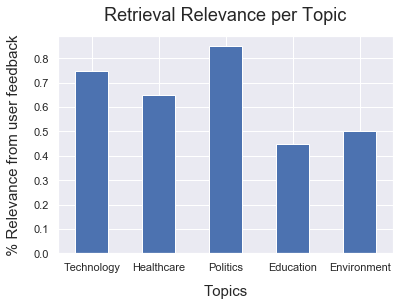

In [143]:
# plt.bar(df['topic'], df['user_feedback'])
fig = plt.figure(figsize=(5, 7))
df.plot(kind='bar', legend=False, width=0.5, x='topic')
plt.xticks(rotation=0, fontname='Arial Unicode MS')
# plt.bar_label()
plt.title('Retrieval Relevance per Topic', pad=15, fontsize=18, fontweight='bold', fontname='Arial Unicode MS')
plt.xlabel('Topics', labelpad=12, size=15, fontname='Arial Unicode MS')
plt.ylabel('% Relevance from user feedback', labelpad=12, size=15, fontname='Arial Unicode MS')
fig.subplots_adjust(bottom=0.5)
plt.show()

In [147]:
# sql_query = "SELECT classifier, AVG(user_feedback) FROM IRProject4Database WHERE user_feedback IS NOT NULL GROUP BY classifier"
# records = run_query(db, sql_query)
# df = pd.DataFrame(records, columns=['Retrieval Index', 'user_feedback'])

In [145]:
df = pd.DataFrame([['Reddit', 0.65],
['Chitchat', 0.75]], columns=['Retrieval Index', 'user_feedback'])

<Figure size 360x504 with 0 Axes>

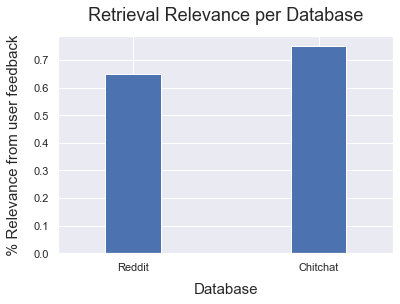

In [146]:
fig = plt.figure(figsize=(5, 7))
df.plot(kind='bar', legend=False, width=0.3, x='Retrieval Index')
plt.xticks(rotation=0, fontname='Arial Unicode MS')
# plt.bar_label()
plt.title('Retrieval Relevance per Database', pad=15, fontsize=18, fontweight='bold', fontname='Arial Unicode MS')
plt.xlabel('Database', labelpad=10, size=15, fontname='Arial Unicode MS')
plt.ylabel('% Relevance from user feedback', labelpad=12, size=15, fontname='Arial Unicode MS')
fig.subplots_adjust(bottom=0)
plt.show()

In [148]:
# aggregate user feedback for relevance

In [ ]:
# sql_query = "SELECT session_id, AVG(user_feedback) FROM IRProject4Database WHERE user_feedback IS NOT NULL GROUP BY session_id"
# records = run_query(db, sql_query)
# df = pd.DataFrame(records, columns=['session_id', 'user_feedback'])

In [245]:
df = pd.DataFrame([['1axR', 0.2],
['7x6r', 0.4],
['aris', 0.6],
['178r', 0.8],
['kr51', 0.3],
['xnw1', 0.5],
['xn61', 0.7]]
, columns=['session_id', 'user_feedback'])

In [260]:
df_new = pd.cut(df['user_feedback'], bins=[0, 0.3, 0.5, 0.75, 1],
 labels=['irrelevant', 'somewhat relevant', 'relevant', 'highly relevant'])
pie_df = (df_new.value_counts()/len(df)).to_frame().reset_index()
pie_df = pie_df.rename(columns={'index': 'Relevance Judgement'})

In [261]:
pie_df

,Relevance Judgement,user_feedback
0,relevant,0.285714
1,somewhat relevant,0.285714
2,irrelevant,0.285714
3,highly relevant,0.142857


In [262]:
pie_df = pie_df.iloc[pd.Index(pie_df['Relevance Judgement']).get_indexer(['highly relevant','relevant','somewhat relevant', 'irrelevant'])].reset_index(drop=True)
pie_df

,Relevance Judgement,user_feedback
0,highly relevant,0.142857
1,relevant,0.285714
2,somewhat relevant,0.285714
3,irrelevant,0.285714


In [254]:
# pie_df.plot(kind='pie', y='user_feedback', legend=False, wedgeprops={'width': 0.5}, labels=pie_df['Relevance Judgement'])
# plt.title('User Relevance Assessment', pad=15, fontsize=18, fontweight='bold', fontname='Arial Unicode MS')

Text(0.5, 1.0, 'User Relevance Assessment')

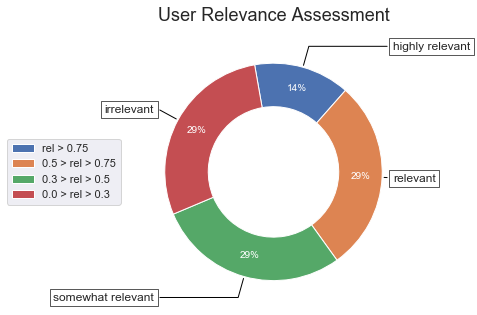

In [276]:
fig, ax = plt.subplots(figsize=(10, 5), subplot_kw=dict(aspect="equal"))

recipe = pie_df['Relevance Judgement']
data = pie_df['user_feedback']

wedges, texts, _ = ax.pie(data, wedgeprops=dict(width=0.4), startangle=100, autopct='%.0f%%',
 pctdistance=0.8, textprops={'fontsize': 10, 'color': 'white', 'fontweight': 'heavy','fontname': 'Arial Unicode MS'},
 counterclock=False)

bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
kw = dict(arrowprops=dict(arrowstyle="-", color='black'),
          bbox=bbox_props, zorder=0, va="center")

for i, p in enumerate(wedges):
    ang = (p.theta2 - p.theta1)/2. + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = "angle,angleA=0,angleB={}".format(ang)
    kw["arrowprops"].update({"connectionstyle": connectionstyle})
    ax.annotate(recipe[i], xy=(x, y), xytext=(1.1*np.sign(x), 1.2*y),
                horizontalalignment=horizontalalignment, **kw)

ax.legend(['rel > 0.75', '0.5 > rel > 0.75', '0.3 > rel > 0.5', '0.0 > rel > 0.3'], loc='center left', bbox_to_anchor=[-0.5, 0.5])
plt.title('User Relevance Assessment', pad=15, fontsize=18, fontweight='bold', fontname='Arial Unicode MS')

In [ ]:
# Distribution of no. of retrieved documents

# box plot


In [ ]:
# sql_query = "SELECT topic, meta FROM IRProject4Database"
# records = run_query(db, sql_query)
# filter records by extracting total retrieved

# for rec in records:
#     rec['total_retrieved'] = rec['meta']['total_retrieved']

# topic_docs_df = pd.DataFrame(records, columns=['topic', 'total_retrieved'])

In [ ]:
topic_docs_df = pd.DataFrame([['Technology', 70],
  ['Healthcare', 20],
   ['Technology', 30],
    ['Healthcare', 65],
    'Technology', 50]])

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

relative_path = "IRProject4_git_4Dec/CSE_535_Information_Retrieval-/retrieval/analytics/"


rel_path_word_clouds = "word_clouds_2/"

img1 = mpimg.imread(relative_path + rel_path_word_clouds + 'word_cloud_edu_2.png')
imgplot1 = plt.imshow(img1)
plt.show()

img2 = mpimg.imread(relative_path + rel_path_word_clouds + 'word_cloud_health_2.png')
imgplot2 = plt.imshow(img2)
plt.show()

img3 = mpimg.imread(relative_path + rel_path_word_clouds + 'word_cloud_env_2.png')
imgplot3 = plt.imshow(img3)
plt.show()

img4 = mpimg.imread(relative_path + rel_path_word_clouds + 'word_cloud_poli_2.png')
imgplot4 = plt.imshow(img4)
plt.show()

img5 = mpimg.imread(relative_path + rel_path_word_clouds + 'word_cloud_tech_2.png')
imgplot5 = plt.imshow(img5)
plt.show()